(300, 2)


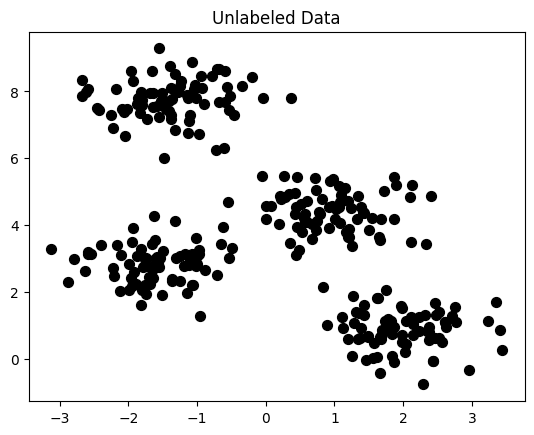

AttributeError: 'NoneType' object has no attribute 'split'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Data generation
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c='k', s=50)
plt.title("Unlabeled Data")
plt.show()

# KMeans training
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title("KMeans Clustering")
plt.show()



# Data generation with overlapping clusters
X_overlap, _ = make_blobs(n_samples=300, centers=[[-2, 0], [0, 0], [2, 0]],
                          cluster_std=1.2, random_state=42)
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c='k', s=50)
plt.title("Unlabeled Data")
plt.show()

# KMeans training
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_overlap)
y_kmeans = kmeans.predict(X_overlap)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title("KMeans Clustering - overlapping clusters")
plt.show()


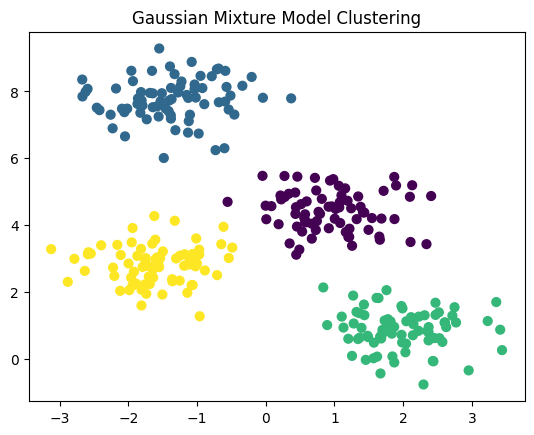

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Data generation
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# GMM training - EM
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.show()


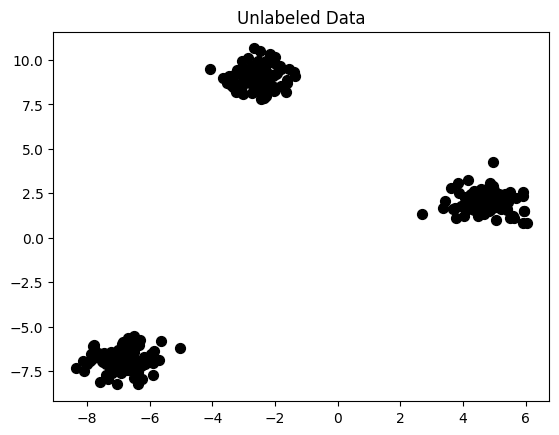

/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


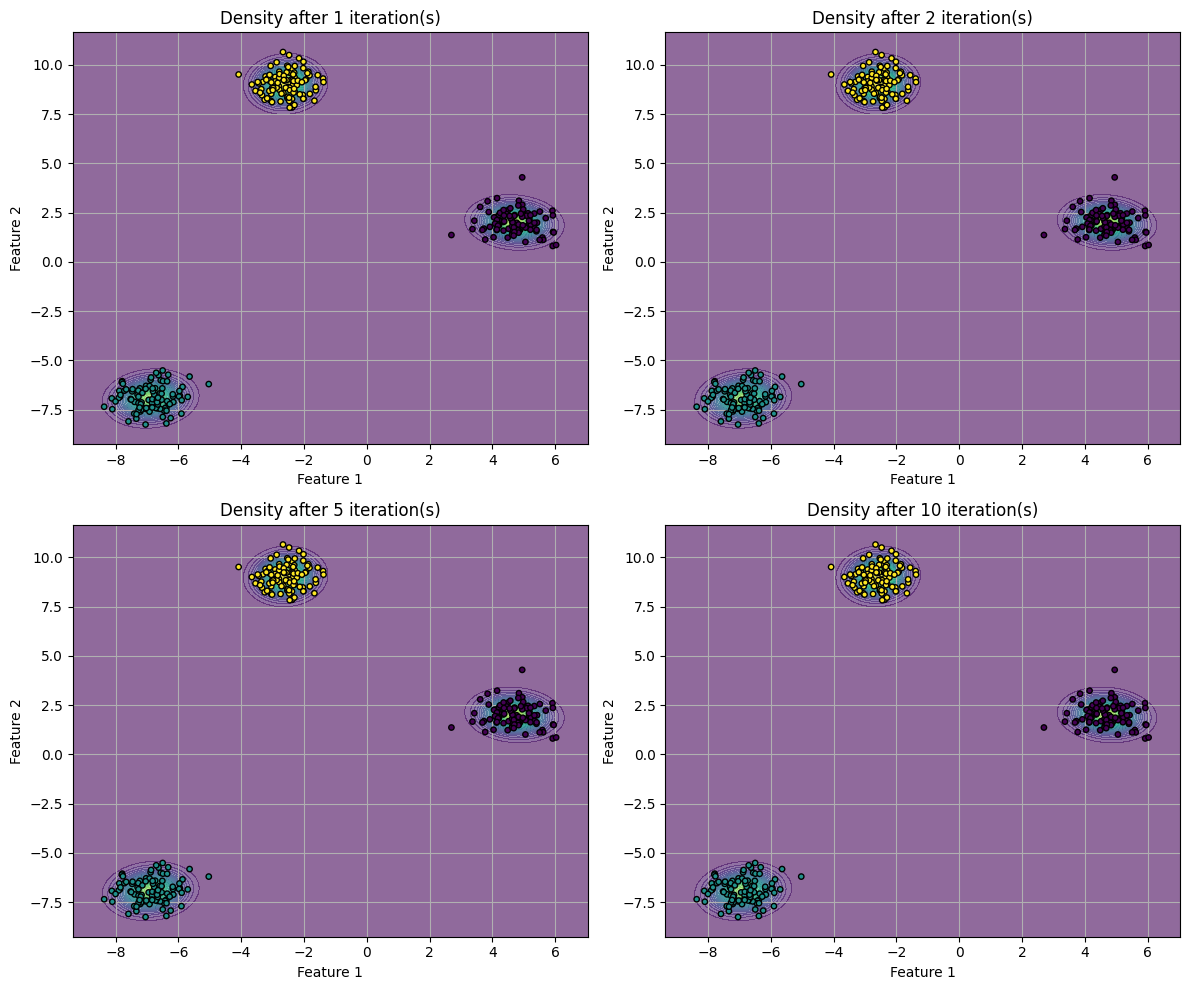

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 1. 데이터 생성
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='k', s=50)
plt.title("Unlabeled Data")
plt.show()

def run_em_iterations(X, n_components, n_iter_list):
    models = []
    for n_iter in n_iter_list:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                              max_iter=n_iter, warm_start=True, random_state=42)
        gmm.fit(X)
        models.append((n_iter, gmm))
    return models

n_iter_list = [1, 2, 5, 10]
gmm_models = run_em_iterations(X, 3, n_iter_list)

def plot_gmm_density(ax, gmm, X, title):
    x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
    X_grid, Y_grid = np.meshgrid(x, y)
    XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T

    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X_grid.shape)

    ax.contourf(X_grid, Y_grid, np.exp(-Z), levels=30, cmap='viridis', alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], s=15, c=gmm.predict(X), cmap='viridis', zorder=2, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, (n_iter, gmm) in enumerate(gmm_models):
    plot_gmm_density(axs[i], gmm, X, f"Density after {n_iter} iteration(s)")

plt.tight_layout()
plt.show()


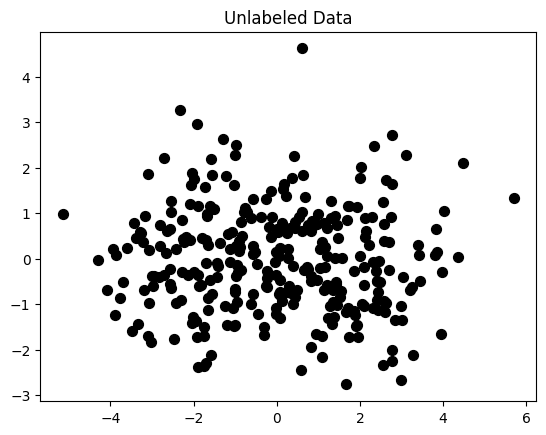

/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


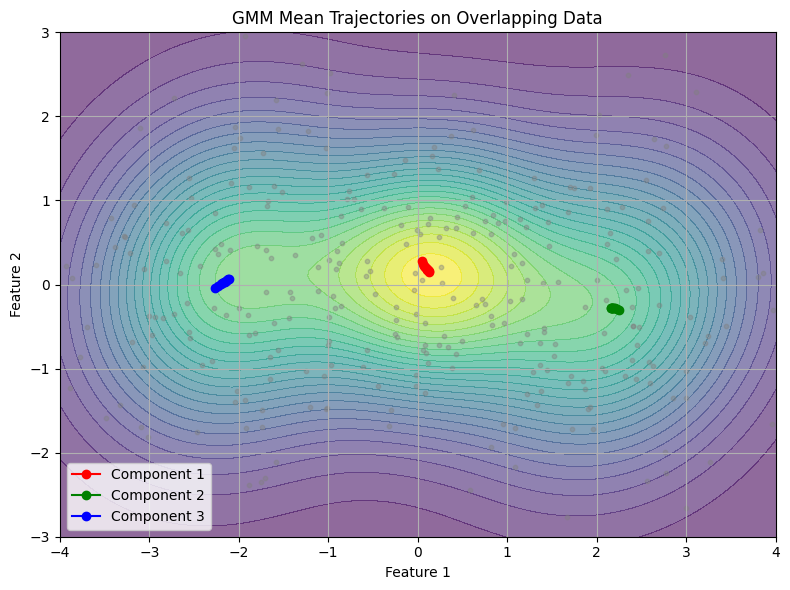

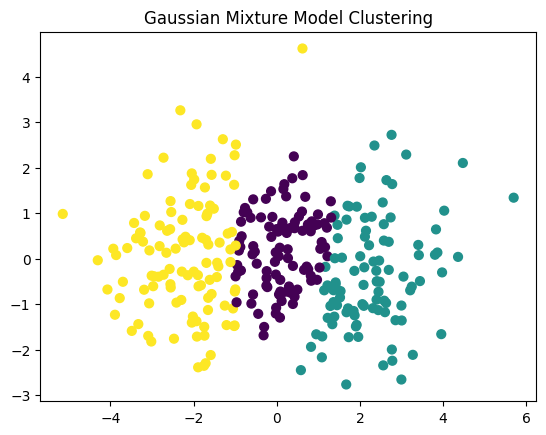

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 1. 겹치는 데이터 생성
X_overlap, _ = make_blobs(n_samples=300, centers=[[-2, 0], [0, 0], [2, 0]],
                          cluster_std=1.2, random_state=42)
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c='k', s=50)
plt.title("Unlabeled Data")
plt.show()

# 2. EM 반복마다 중심 추적
def run_em_with_tracking(X, n_components, max_iter):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                          max_iter=1, warm_start=True, random_state=42)
    mean_trace = []
    for _ in range(max_iter):
        gmm.fit(X)
        mean_trace.append(gmm.means_.copy())
    return gmm, mean_trace

# 3. 모델 훈련 및 추적
max_em_iter = 10
final_model, mean_trace = run_em_with_tracking(X_overlap, 3, max_em_iter)

# 4. 밀도 시각화 + 중심 궤적
def plot_gmm_trace(X, model, trace, title=""):
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots(figsize=(8, 6))

    # 밀도 등고선
    x = np.linspace(X[:, 0].min() - 2, X[:, 0].max() + 2, 200)
    y = np.linspace(X[:, 1].min() - 2, X[:, 1].max() + 2, 200)
    X_grid, Y_grid = np.meshgrid(x, y)
    XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T
    Z = -model.score_samples(XX).reshape(X_grid.shape)
    ax.contourf(X_grid, Y_grid, np.exp(-Z), levels=30, cmap='viridis', alpha=0.6)

    # 데이터 포인트
    ax.scatter(X[:, 0], X[:, 1], s=10, c='gray', alpha=0.4)

    # 중심 궤적
    trace = np.array(trace)
    for k in range(model.n_components):
        mu_path = trace[:, k, :]
        ax.plot(mu_path[:, 0], mu_path[:, 1], marker='o', color=colors[k], label=f'Component {k+1}')

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    ax.grid(True)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-3, 3])
    plt.tight_layout()
    plt.show()


# 5. 시각화 실행
plot_gmm_trace(X_overlap, final_model, mean_trace, title="GMM Mean Trajectories on Overlapping Data")

# Visualization
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=final_model.predict(X_overlap), s=40, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.show()